In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Get the data
btc = yf.Ticker("BTC-USD")
df = btc.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-02 00:00:00+00:00,23720.824219,24167.210938,23468.595703,23471.871094,32066936882,0.0,0.0
2023-02-03 00:00:00+00:00,23469.412109,23678.103516,23279.955078,23449.322266,27083066007,0.0,0.0
2023-02-04 00:00:00+00:00,23446.320312,23556.949219,23291.794922,23331.847656,15639298538,0.0,0.0


In [27]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3065.000000,3065.000000,3065.000000,3065.000000,3.065000e+03,3065.0,3065.0
mean,12951.572564,13276.577218,12590.682623,12957.346263,1.641853e+10,0.0,0.0
std,16117.081570,16528.747151,15641.894873,16112.983373,1.988277e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,690.289001,705.257019,678.039978,694.468994,1.063630e+08,0.0,0.0
50%,7208.636719,7367.330078,7038.124512,7217.427246,7.775128e+09,0.0,0.0
75%,17129.710938,17579.599609,16877.880859,17133.152344,2.788198e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


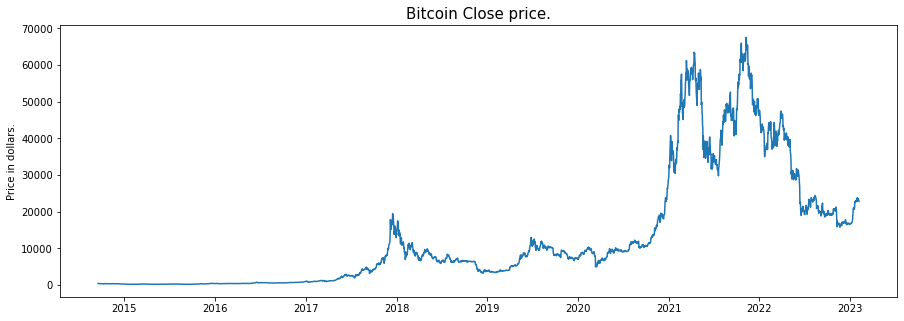

In [28]:
#Exploratory Data Analysis
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3065 entries, 2014-09-17 00:00:00+00:00 to 2023-02-06 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3065 non-null   float64
 1   High          3065 non-null   float64
 2   Low           3065 non-null   float64
 3   Close         3065 non-null   float64
 4   Volume        3065 non-null   int64  
 5   Dividends     3065 non-null   float64
 6   Stock Splits  3065 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 191.6 KB


In [30]:
# Preprocess the data
df = df.dropna()

In [31]:
# Split the data into training and testing sets
X = df.drop('Close', axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Train linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# Train decision tree model
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
# Train random forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [35]:
# Train XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [36]:
# Evaluate each model
reg_pred = regressor.predict(X_test)
dt_pred = dt_regressor.predict(X_test)
rf_pred = rf_regressor.predict(X_test)
xgb_pred = xgb_regressor.predict(X_test)


In [37]:
reg_mse = mean_squared_error(y_test, reg_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

In [38]:
# Select the best model based on MSE
best_model = None
best_mse = float('inf')
if reg_mse < best_mse:
    best_model = regressor
    best_mse = reg_mse
if dt_mse < best_mse:
    best_model = dt_regressor
    best_mse = dt_mse
if rf_mse < best_mse:
    best_model = rf_regressor
    best_mse = rf_mse
if xgb_mse < best_mse:
    best_model = xgb_regressor
    best_mse = xgb_mse

In [39]:
#Print the MSE of each model
print(f"Linear Regression MSE: {reg_mse}")
print(f"Decision Tree Regressor MSE: {dt_mse}")
print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"XGBoost Regressor MSE: {xgb_mse}")

Linear Regression MSE: 86435.52341917907
Decision Tree Regressor MSE: 270905.5566414183
Random Forest Regressor MSE: 181499.5701625944
XGBoost Regressor MSE: 246041.5635594646


In [40]:
#Predict the next value using the best model
new_input = X_test.iloc[-1, :].values.reshape(1, -1) # last row of X_test as new input
new_output = best_model.predict(new_input)
print(f"\nPredicted Output: {new_output[0]}")


Predicted Output: 6414.555577735523


C:\Users\AdminPC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
#Evaluate the best model using mean absolute error and R2 score
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 134.55455708805454
R2 Score: 0.9996445777099604


In [42]:
#Get the accuracy of the selected model
r2_score_best = r2_score(y_test, best_model.predict(X_test))
print(f"R^2 score of the selected model: {r2_score_best}")

R^2 score of the selected model: 0.9996445777099604


In [47]:
#Predict the close price of the next day
next_day_input = df.iloc[-1].drop('Close')
next_day_pred = best_model.predict(np.array(next_day_input).reshape(1, -1))
print(f"Predicted close price for the next day: {next_day_pred[0]}")

Predicted close price for the next day: 22818.56008294058


C:\Users\AdminPC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


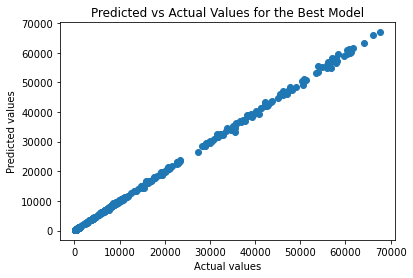

In [48]:
# Plot the predicted vs actual values for the best model
plt.scatter(y_test, best_model.predict(X_test))
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values for the Best Model")
plt.show()

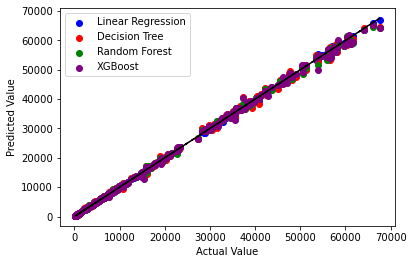

In [49]:
# Plot the predicted vs actual values for each model
plt.scatter(y_test, reg_pred, c='blue', label='Linear Regression')
plt.scatter(y_test, dt_pred, c='red', label='Decision Tree')
plt.scatter(y_test, rf_pred, c='green', label='Random Forest')
plt.scatter(y_test, xgb_pred, c='purple', label='XGBoost')
plt.plot(y_test, y_test, c='black', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

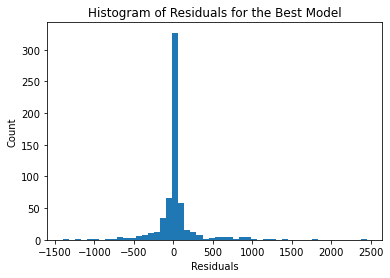

In [50]:
# Plot the residuals for the best model
residuals = y_test - best_model.predict(X_test)
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Histogram of Residuals for the Best Model")
plt.show()